# O-Ring Failure Model

## Project Description
One of the reasons for the Challenger disaster of January 1986 was reported the o-ring failure; you can watch a short
video: (https://www.youtube.com/watch?v=yibNEcn-4yQ). Six o-rings were used to seal field joints on the rocket motor
assembly. The ORing.csv file presents the launch temperatures. A "1" means that at least one o-ring failure had occurred
on the launch.

Build a Model to predict the O-ring failure at different temperatures.


## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('../../data/ORing.csv')
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, -1].values
dataset

,Temperature,Failure
0,53,1
1,56,1
2,57,1
3,63,0
4,66,0
5,67,0
6,67,0
7,67,0
8,68,0
9,69,0


## Training the Decision Tree Regression model on the whole dataset

In [4]:
from sklearn.linear_model import LogisticRegression

LogitReg = LogisticRegression()
LogitReg.fit(X, y)

LogisticRegression()

## Predicting a new result

In [5]:
LogitReg.predict([[30]])

array([1])

## Checking the Probability

In [6]:
Probability = LogitReg.predict_proba([[30]])

print("Chance of Failure is ", 100*Probability[0,1], "%" )

Chance of Failure is  99.66727207067777 %


## Visualising the Logistic Regression

[[53]
 [56]
 [57]
 [63]
 [66]
 [67]
 [67]
 [67]
 [68]
 [69]
 [70]
 [70]
 [70]
 [70]
 [72]
 [73]
 [75]
 [75]
 [76]
 [76]
 [78]
 [79]
 [80]
 [80]]


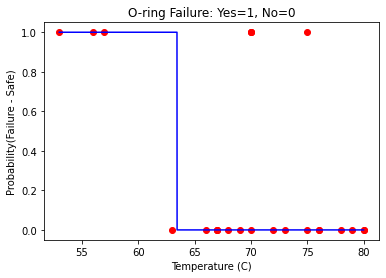

In [9]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, LogitReg.predict(X_grid), color='blue')
plt.title('O-ring Failure: Yes=1, No=0')
plt.xlabel('Temperature (C)')
plt.ylabel('Probability(Failure - Safe)')
plt.show()

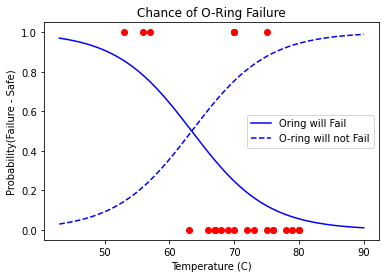

In [8]:
X_grid = np.arange(min(X) - 10, max(X) + 10, 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')

Probability = LogitReg.predict_proba(X_grid)
plt.plot(X_grid, Probability[:, 1], "b", label="Oring will Fail")
plt.plot(X_grid, Probability[:, 0], 'b--', label="O-ring will not Fail")

plt.legend(loc='best')

plt.title('Chance of O-Ring Failure')
plt.xlabel('Temperature (C)')
plt.ylabel('Probability(Failure - Safe)')
plt.show()